# INTRODUCCIÓN

Para empezar, y antes de realizar nada importante, procederemos a importar las bibliotecas necesarias para todo el trabajo.

In [1]:
# Librerías básicas

import time
import pickle
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

# Modelo extra elegido de librería externa a SKlearn

import xgboost as xgb

# Librerías para procesamiento de datos, entrenamiento, etc.

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modelos de Aprendizaje Automático usados

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Selección de atributos, selección de modelos y métricas

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, classification_report

# Exportación del modelo

from joblib import dump

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Como bien indica la práctica, vamos a realizar un EDA sencillo para observar y analizar algunas características clave del conjunto proporcionado.

Primero empezaremos simplemente cargando los datos y viendo su tamaño.

In [2]:
# Se cargan los datos y se incluyen en un Dataframe
with open('attrition_available_4.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data)

# Se cuentan el número de filas y columnas
num_rows = df.shape[0]
num_columns = df.shape[1]

print("El DataFrame tiene {} filas y {} columnas".format(num_rows, num_columns))

El DataFrame tiene 4410 filas y 31 columnas


Procedemos a imprimir el dataset por pantalla para echarle un primer vistazo:

In [3]:
# Se imprime todo el Dataframe
pd.options.display.max_columns = 31
pd.options.display.max_rows = 4410

df

hrs  absences  JobInvolvement  PerformanceRating  \
1           NaN      13.0             2.0                4.0   
6      6.450877      17.0             3.0                4.0   
13     8.871421      14.0             2.0                NaN   
28    10.713066       6.0             NaN                3.0   
30     9.662808      11.0             NaN                3.0   
35     9.570924      17.0             3.0                3.0   
38     6.177288      22.0             2.0                3.0   
59     7.588037      10.0             3.0                NaN   
65    10.641073       2.0             2.0                3.0   
69     9.851604       3.0             3.0                NaN   
78     9.678279      19.0             3.0                3.0   
99     7.970253       5.0             2.0                3.0   
105    9.749403      18.0             1.0                4.0   
108    7.100332      16.0             4.0                3.0   
110    8.736000      15.0             2.0                NaN   
112    5.537753       NaN             3.0                3.0   
120    8.600742      14.0             3.0                4.0   
124    6.746369       9.0             NaN                3.0   
127    7.895577       9.0             2.0                3.0   
147    6.134392      13.0             3.0                3.0   
156   10.092957      13.0             2.0                3.0   
157    5.656245      22.0             3.0                4.0   
163    6.330713      12.0             2.0                NaN   
164    7.429799      15.0             3.0                NaN   
177    7.966946      15.0             2.0                4.0   
178    6.825260       5.0             3.0                4.0   
181    6.032699      21.0             2.0                3.0   
182   10.465666      12.0             NaN                NaN   
185    6.032680      15.0             NaN                3.0   
195    9.005944       NaN             NaN                3.0   
199    8.933678       NaN             4.0                3.0   
205    8.189085      16.0             1.0                4.0   
211         NaN       8.0             2.0                4.0   
221   10.695009       NaN             NaN                4.0   
222    6.435713       NaN             NaN                3.0   
224    6.415040      10.0             NaN                3.0   
237    6.222710      10.0             3.0                NaN   
246    6.935332      21.0             3.0                NaN   
255         NaN      11.0             2.0                3.0   
256   10.277306       3.0             3.0                3.0   
267    7.271326       NaN             1.0                3.0   
270    8.106146       3.0             2.0                3.0   
282    7.447954       NaN             NaN                3.0   
289         NaN      10.0             3.0                4.0   
304    9.606077      11.0             3.0                3.0   
308    9.325049      17.0             3.0                3.0   
310    7.658246      10.0             3.0                3.0   
315    5.719818      19.0             3.0                3.0   
327    7.590754       NaN             2.0                3.0   
331         NaN       1.0             4.0                3.0   
333    7.762305       7.0             2.0                3.0   
337    8.288949       NaN             3.0                3.0   
340    5.729442      19.0             2.0                3.0   
349    5.832748      18.0             4.0                3.0   
350         NaN      21.0             4.0                3.0   
356         NaN      19.0             3.0                NaN   
378    9.277542      18.0             NaN                3.0   
387    9.130345       7.0             3.0                NaN   
398    9.944511       2.0             2.0                3.0   
402         NaN       5.0             NaN                3.0   
404    6.677385      15.0             1.0                3.0   
405    7.751382       4.0             3.0   

Ya en una primera ojeada visual podemos observar que los datos tienen elementos especiales, más allá de simples números: instancias nulas, categorías...

Vamos a ver qué columnas son intrínscamente númericas y cuales categóricas:

In [4]:
# Se imprime el tipo de datos que tienen los atributos
df.dtypes

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Columnas numéricas: {}\nColumnas categóricas/ordinales: {}".format(num_cols, cat_cols))
print()
print("Tipo de las columnas numéricas: {}\nTipo de las columnas categóricas/ordinales: {}".format(dict(df[num_cols].dtypes), dict(df[cat_cols].dtypes)))

Columnas numéricas: Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Columnas categóricas/ordinales: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

Tipo de las columnas numéricas: {'hrs': dtype('float64'), 'absences': dtype('float64'), 'JobInvolvement': dtype('float64'), 'PerformanceRating': dtype('float64'), 'EnvironmentSatisfaction': dtype('float64'), 'JobSatisfaction': dtype('float64'), 'WorkLifeBalance': dtype('float64'), 'Age': dtype('float64'), 'D

Hay un total de 23 atributos numéricos y 8 categóricos/ordinales, encontrándose dentro de este último grupo la clase "Attrition".

Ahora, vamos a ver si existen columnas constantes.

In [5]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"La columna '{col}' tiene valores constantes: {df[col].iloc[0]}")

La columna 'EmployeeCount' tiene valores constantes: 1
La columna 'Over18' tiene valores constantes: Y
La columna 'StandardHours' tiene valores constantes: 8.0


Al haber columnas con valores constantes estas pueden eliminarse, siendo estas "EmployeeCount", "Over18" y "StandardHours".

A continuación, vamos a ver la proporción de valores faltantes (missing values) en cada atributo.

In [6]:
prop_missing = df.isna().mean()
print(prop_missing)

hrs                        0.167574
absences                   0.165306
JobInvolvement             0.185034
PerformanceRating          0.166440
EnvironmentSatisfaction    0.219048
JobSatisfaction            0.004535
WorkLifeBalance            0.209070
Age                        0.163492
Attrition                  0.000000
BusinessTravel             0.173696
Department                 0.189342
DistanceFromHome           0.211791
Education                  0.213832
EducationField             0.184580
EmployeeCount              0.000000
EmployeeID                 0.173243
Gender                     0.178005
JobLevel                   0.184580
JobRole                    0.196145
MaritalStatus              0.168254
MonthlyIncome              0.167574
NumCompaniesWorked         0.183673
Over18                     0.194331
PercentSalaryHike          0.000000
StandardHours              0.184580
StockOptionLevel           0.190023
TotalWorkingYears          0.002041
TrainingTimesLastYear      0

Dado que se busca responder a la pregunta de si el empleado abandonaría o no la empresa, el problema es categórico.


Por último, y antes de pasar al siguiente apartado de la práctica, comprobamos si el conjunto de datos está desbalanceado o no. 

Para ello, primero se procede a revisar si el número de entradas totales que tiene la columna "Attrition" (la clase) coincide con el número total de filas y estas entradas se reparten entre los valores "No" y "Yes". Si se cumple con esto, se descubre que la clase no contiene valores nulos, lo cual igualmente ya se conocía en la ejecución del bloque de código anterior; aunque se prefiere volver a demostrar.

Finalmente, se calcula la proporción de los valores categóricos "Yes" y "No" de la clase con respecto al número total de instancias.

In [7]:
# Se cuenta el número de ocurrencias de cada valor en la columna "attrition"
counts = df["Attrition"].value_counts()

print(counts)
print()

# Se compruba si la clase "Attrition" tiene valores nulos
total_counts = counts.sum()

if total_counts == num_rows:
  print("La clase 'Attrition' NO tiene valores nulos\n")
else:
  print("La clase 'Attrition' tiene valores nulos\n")

# Se calcula la proporción de muestras en cada clase
proportions = counts / len(df)

proportions

No     3699
Yes     711
Name: Attrition, dtype: int64

La clase 'Attrition' NO tiene valores nulos



No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Como puede observarse, **sí hay desbalance** en la muestra de datos. Esto lo corregiremos más adelante para que los modelos se entrenen correctamente.

# PARTICIÓN DE LOS DATOS

Procederemos a partir los datos en train y test. Para ello tenemos que hacer "limpieza" usando la información que hemos conseguido con el EDA.

In [8]:
# Se actualizan el listado de atributos categóricos y numéricos, eliminando los constantes

num_cols = np.delete(num_cols, [10, 16])
print(num_cols)

cat_cols = cat_cols[:7]
print(cat_cols)

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')


In [9]:
# Se crea el conjunto de atributos y clase
X = df.drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=4, stratify=y)

# Imprimos la forma de los conjuntos, ahora que los tenemos separados

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2940, 27) (2940,)
(1470, 27) (1470,)


Ahora, los conjuntos tanto de X_train y X_test, así como el X original, tenemos que procesarlos acordes a las conclusiones que hemos sacado en el EDA. 

Utilizaremos dos imputadores simples para procesar tanto los valores numéricos como los categóricos, y realizaremos la transformación usando una Tubería.

In [10]:
# Procesamiento de valores numéricos.

imputer_num = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline_num = Pipeline(
    steps=[
        ("imputer", imputer_num),
        ("scaler", scaler)
    ]
)

# Procesamiento de valores categóricos.
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder()
pipeline_cat =  Pipeline(
    steps=[
        ('imputer', imputer_cat),
        ('encoder', encoder)
    ]
)

# Dependiendo del tipo de columna se aplica una transformación u otra.
processor = ColumnTransformer(
    transformers=[
        ("num", pipeline_num, num_cols),
        ("cat", pipeline_cat, cat_cols[1:]),
    ]
)

# Procesamiento

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

X_processed = processor.fit_transform(X)

Lo importante lo tenemos: los datos procesados. Sin embargo, antes de empezar a montar y entrenar los modelos, vamos a crear un par de elementos importantes que nos serán de ayuda para más adelante.

Lo primero, vamos a crear un diccionario que asocie los nombres de las columnas del conjunto de datos original con el procesado (sólo con el X_train)

Así, podremos en un futuro sacar en claro cuáles son los atributos más importantes, sabiendo asociar los datos de la tabla procesada (cuyos nombres se omiten o remplazan) a algún elemento distinguible.

In [11]:
# Una primera impresión para saber con qué trabajamos

original_column_names = X_train.columns.tolist()
print(original_column_names)
original_column_indices = list(range(len(original_column_names)))
print(original_column_indices)

# Creamos un diccionario que mapea los nombres de la columna original con sus indices en la numpy matrix

column_name_to_index = {}

for transformer in processor.transformers_:
    if transformer[0] == "num":
        # Cogemos los índices de las columnas numéricas
        numeric_indices = transformer[2]
        # Mapeamos en el diccionario, asociando correctamente
        for i, column_name in enumerate(original_column_names):
            if column_name in numeric_indices:
                column_name_to_index[column_name] = original_column_indices[i]
    elif transformer[0] == "cat":
        # Cogemos el encoder de la columna categórica
        encoder = transformer[1]["encoder"]
        # Cogemos el nombre de las columnas categóricas
        categorical_names = encoder.get_feature_names_out(cat_cols[1:])
        # Mapeamos
        for i, column_name in enumerate(original_column_names):
            if column_name in categorical_names:
                column_name_to_index[column_name] = original_column_indices[i]

# Imprimos el diccionario resultante

print(column_name_to_index)

['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
{'hrs': 0, 'absences': 1, 'JobInvolvement': 2, 'PerformanceRating': 3, 'EnvironmentSatisfaction': 4, 'JobSatisfaction': 5, 'WorkLifeBalance': 6, 'Age': 7, 'DistanceFromHome': 10, 'Education': 11, 'EmployeeID': 13, 'JobLevel': 15, 'MonthlyIncome': 18, 'NumCompaniesWorked': 19, 'PercentSalaryHike': 20, 'StockOptionLevel': 21, 'TotalWorkingYears': 22, 'TrainingTimesLastYear': 23, 'YearsAtCompany': 24, 'YearsSinceLastPromotion':

Podemos fijarnos en que realmente las columnas procesadas y las originales prácticamente comparten posición, pero no todas.

Ahora, tanto en y_train como  en y_test vamos a remplazar los No y los Yes (categóricos booleanos) de la clase por valores númericos (0-1) para poder aplicar la métrica f1 de manera correcta. De otro modo, en algunos modelos provocaría errores de ejecución.


In [12]:
y_train.replace({'No': 0, 'Yes': 1}, inplace=True)
y_test.replace({'No': 0, 'Yes': 1}, inplace=True)
y.replace({'No': 0, 'Yes': 1}, inplace=True)

Y por último, pero no menos importante, vamos a dejar creado nuestro "inner" para las validaciones cruzadas que utilizaremos en los modelos que se entrenarán a continuación (los que requieran de optimización de hiperparámetros).

Es importante tener en cuenta que dicha validación cruzada tiene que ser estratificada, debido a a la conclusión que sacamos anteriormente de que el problema está desbalanceado.

In [13]:
stratified_cv = StratifiedKFold(n_splits=5)

# CONSTRUCCIÓN DE LOS MODELOS

Vamos a empezar con los modelos. Como se pide en la práctica, se realizarán tres: el primero sin optimización de hiperparámetros, y los dos siguientes con ella. Uno de estos dos últimos modelos ha sido realizado de forma opcional por medio de una librería externa a SKlearn.

## LOGISTIC REGRESSION

La forma de proceder a la hora de construir dichos modelos es muy similar a la de la práctica anterior: usando Pipelines, construiremos el modelo correspondiente.
 
En este primero, añadiremos la variable "class_weight", para que dicho modelo tenga en cuenta el desbalanceo de los datos, así como un random state asociado a nuestro número de grupo (aquí sí se pueden barajar los datos sin problema).

También, las métricas de evaluación son distintas en esta práctica, siendo Balance Accuracy, F1 y la Matriz de Confusión las utilizadas.

In [14]:
# Modelo de Regresión Logística
logistic_regr = Pipeline([('logistic_regression', LogisticRegression(class_weight='balanced', random_state=4))])

# Entrenamiento
start_time = time.time()
logistic_regr.fit(X_train_processed, y_train)
end_time = time.time()

elapsed_time_logistic_regr = end_time - start_time

# Predicción
logistic_regr_pred = logistic_regr.predict(X_test_processed)

# Evaluación
balanced_accuracy_logistic_regr = balanced_accuracy_score(y_test, logistic_regr_pred)
f1_logistic_regr = f1_score(y_test, logistic_regr_pred)
confusion_matrix_logistic_regr = confusion_matrix(y_test, logistic_regr_pred)

print("Tiempo de ejecución para entrenar el modelo de Regresión Logística: ", elapsed_time_logistic_regr)

print("Balance Accuracy de la Regresión Logística:", balanced_accuracy_logistic_regr)
print("F1 de la Regresión Logística:", f1_logistic_regr)
print("Matriz de confusión de la Regresión Logística:", confusion_matrix_logistic_regr)

Tiempo de ejecución para entrenar el modelo de Regresión Logística:  0.06167721748352051
Balance Accuracy de la Regresión Logística: 0.7052008582545402
F1 de la Regresión Logística: 0.4346701164294955
Matriz de confusión de la Regresión Logística: [[865 368]
 [ 69 168]]


Vamos a interpretar las métricas obtenidas:

*   El Balance Accuracy entra dentro de lo que se considera un rango "bueno" en cuanto a performance del modelo.
*   El F1, sin embargo, no es bueno: no llega al 50% de performance.
*   La matriz de confusión tampoco se presenta muy esperenzadora, ya que podemos observar que tiene muchos falsos positivos y falsos negativos.

El tiempo de ejecución es casi instantáneo.






## BOOSTING

De entre los métodos de Boosting ofrecidos en scikit-learn, ahora vamos a utilizar Adaboost Classifier. Aquí, antes de entrenar y predecir, realizaremos la optimización de hiperparámetros pertinente.

En la optimización usaremos el StratifiedKfold en el parámetro "cv" que obtuvimos más arriba. En los RandomizedSearch siempre usaremos F1 como métrica guía. Incluimos en el arbol de decisión (estimador del boosting) el paramétro de class_weight.

In [15]:
# Modelo de Boosting (Adaboost.M1)
boosting_mandatory = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Definición del espacio de búsqueda de hiperparámetros
boosting_mandatory_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'random_state': [4]
}

tree_params = {
    'estimator__max_depth': range(2, 16, 2),
    'estimator__min_samples_split': range(2, 8, 2),
    'estimator__class_weight': ['balanced']
}

# Definición de la búsqueda

boosting_mandatory_rs = RandomizedSearchCV(estimator=boosting_mandatory,
                                           param_distributions={**tree_params, **boosting_mandatory_params},
                                           n_iter=50,
                                           cv=stratified_cv,
                                           n_jobs=-1,
                                           random_state=4,
                                           scoring='f1')

# Entrenamiento
start_time = time.time()
boosting_mandatory_rs.fit(X_train_processed, y_train)
boosting_mandatory_model = boosting_mandatory_rs.best_estimator_
end_time = time.time()

elapsed_time_boosting_mandatory = end_time - start_time

# Predicción

boosting_mandatory_pred = boosting_mandatory_model.predict(X_test_processed)

# Evaluación
print(f'El mejor modelo encontrado es: {boosting_mandatory_rs.best_params_}')
print("Tiempo de ejecución para entrenar el modelo Adaboost: ", elapsed_time_boosting_mandatory)

balanced_accuracy_boosting_mandatory = balanced_accuracy_score(y_test, boosting_mandatory_pred)
f1_boosting_mandatory = f1_score(y_test, boosting_mandatory_pred)
confusion_matrix_boosting_mandatory = confusion_matrix(y_test, boosting_mandatory_pred)

print()
print()
print("Balance Accuracy del AdaBoost:", balanced_accuracy_boosting_mandatory)
print("F1 del AdaBoost:", f1_boosting_mandatory)
print("Matriz de confusión del AdaBoost:", confusion_matrix_boosting_mandatory)

El mejor modelo encontrado es: {'random_state': 4, 'n_estimators': 50, 'learning_rate': 0.1, 'estimator__min_samples_split': 2, 'estimator__max_depth': 12, 'estimator__class_weight': 'balanced'}
Tiempo de ejecución para entrenar el modelo Adaboost:  499.24980878829956


Balance Accuracy del AdaBoost: 0.7161651626679808
F1 del AdaBoost: 0.5959885386819485
Matriz de confusión del AdaBoost: [[1225    8]
 [ 133  104]]


Ahora, al fijarnos en las métricas, podemos ver que el Balance Accuracy ha mejorado y el F1 también. Esto se ha reflejado consecuentemente en la matriz de confusión, que aunque sigue cometiendo fallos, es mejor que el anterior caso; por ejemplo, en cuanto a los casos positivos.

## XGBOOSTING (MODELO ADICIONAL)

Ahora vamos a utilizar Extreme Gradient Boosting de una librería externa ajena a SKlearn para crear un modelo nuevo. Tenemos que poner el objetivo de la misma a ***binary:logistic*** para que entrene el modelo acorde al tipo de dataset que se está recibiendo. También optimizaremos sus hiperparámetros y usaremos las mismas métricas.


In [16]:
# Modelo de XGBoost
xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=4)

# Definición del espacio de búsqueda de hiperparámetros
xgboost_params = {
    "colsample_bytree": [0.3,0.5,0.7],
    "gamma": [0.1,0.25,0.45], 
    "max_depth": [2,3,4,5,6], 
    "n_estimators": [50,100,150],
    "subsample": [0.6,0.5,0.4]}

xgboost_rs = RandomizedSearchCV(estimator=xgboost, 
                                param_distributions=xgboost_params, 
                                random_state=4, 
                                n_iter=50, 
                                cv=stratified_cv, 
                                scoring = 'f1',
                                n_jobs=-1)

# Entrenamiento
start_time = time.time()
xgboost_rs.fit(X_train_processed, y_train)
xgboost_model = xgboost_rs.best_estimator_
end_time = time.time()


elapsed_time_xgboost = end_time - start_time

xgboost_pred = xgboost_model.predict(X_test_processed)


# Evaluación
print(f'El mejor modelo encontrado es: {xgboost_rs.best_params_}')
print()
print("Tiempo de ejecución para entrenar el modelo xgb: ", elapsed_time_xgboost)

balanced_accuracy_xgboost = balanced_accuracy_score(y_test, xgboost_pred)
f1_xgboost = f1_score(y_test, xgboost_pred)
confusion_matrix_xgboost = confusion_matrix(y_test, xgboost_pred)

print("Balance Accuracy del xgboost:", balanced_accuracy_xgboost)
print("F1 del xgboost:", f1_xgboost)
print("Matriz de confusión del xgboost:", confusion_matrix_xgboost)

El mejor modelo encontrado es: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.1, 'colsample_bytree': 0.3}

Tiempo de ejecución para entrenar el modelo xgb:  79.91088247299194
Balance Accuracy del xgboost: 0.7232283100803844
F1 del xgboost: 0.592
Matriz de confusión del xgboost: [[1206   27]
 [ 126  111]]


Este Extreme Boosting nos ofrece unos valores muy similares al Adaboosting anterior.

# ¿SE PUEDEN MEJORAR LOS DATOS?

Vamos a imprimir una pequeña tabla con las métricas obtenidas hasta ahora.

In [17]:
# Crear un dataframe con los resultados de los modelos y sus tiempos
results = pd.DataFrame({'Model': ['Logistic Regression', 'Adaboost_M1', 'xgboost'],
                        'Balanced Accuracy': [balanced_accuracy_logistic_regr, balanced_accuracy_boosting_mandatory, balanced_accuracy_xgboost],
                        'F1': [f1_logistic_regr, f1_boosting_mandatory, f1_xgboost],
                        'Confusion Matrix': [confusion_matrix_logistic_regr, confusion_matrix_boosting_mandatory, confusion_matrix_xgboost],
                        'Time': [elapsed_time_logistic_regr, elapsed_time_boosting_mandatory, elapsed_time_xgboost]})

# Dataframe con mejor estimador y parametros para cada modelo (con HPO)
best_info_model = pd.DataFrame({'Model': ['Adaboost_M1', 'xgboost'],
                               'best-estimator': [boosting_mandatory_rs.best_estimator_, xgboost_rs.best_estimator_],
                               'best-params': [boosting_mandatory_rs.best_params_, xgboost_rs.best_params_]})

# Mostrar los resultados y mejor info de modelos resultantes del HPO
display(results)
display(best_info_model)

Model  Balanced Accuracy        F1          Confusion Matrix  \
0  Logistic Regression           0.705201  0.434670   [[865, 368], [69, 168]]   
1          Adaboost_M1           0.716165  0.595989   [[1225, 8], [133, 104]]   
2              xgboost           0.723228  0.592000  [[1206, 27], [126, 111]]   

         Time  
0    0.061677  
1  499.249809  
2   79.910882

Model                                     best-estimator  \
0  Adaboost_M1  (DecisionTreeClassifier(class_weight='balanced...   
1      xgboost  XGBClassifier(base_score=None, booster=None, c...   

                                         best-params  
0  {'random_state': 4, 'n_estimators': 50, 'learn...  
1  {'subsample': 0.6, 'n_estimators': 150, 'max_d...

Antes de escoger un modelo, queremos ver si se pueden mejorar los resultados obtenidos con los modelos anteriores de algún modo. Para ello, vamos a realizar una selección de los atributos más importantes del conjunto de datos para entrenar dichos modelos, y entrenarlos de manera acorde.

Para ello, vamos a usar el método de SelectKBest con f_classif en los tres modelos, e introducirlo en la pipeline antes de entrenar el modelo. En el primer modelo, introduciremos el número de atributos de manera manual y en los dos últimos se calcularán de manera automática.

**NOTA:** En este primero, usamos k = 13 porque, al hacer pruebas con los modelos posteriores en los que se hace automáticamente, hemos llegado a la conclusión de que 13 es un número óptimo de atributos. Sin embargo, en el cuaderno seguimos el orden de los modelos por claridad.

**LOGISTIC REGRESSION**

In [19]:
selector = SelectKBest(f_classif, k=13)

# Modelo de Regresión Logística con filtro
logistic_regr_filter = Pipeline([('selector', selector), 
                          ('logistic_regression', LogisticRegression(class_weight='balanced', random_state=4))])

# Entrenamiento
start_time = time.time()
logistic_regr_filter.fit(X_train_processed, y_train)
end_time = time.time()

elapsed_time_logistic_regr_filter = end_time - start_time

print(f"Atributos seleccionados: {logistic_regr_filter.named_steps['selector'].get_support()}")
print()

print(f"Localicaciones de los atributos: {np.where(logistic_regr_filter.named_steps['selector'].get_support())}")

print(f"Nombres de los atributos en la tabla procesada: {logistic_regr_filter.named_steps['selector'].get_feature_names_out()}")


logistic_regr_filter_pred = logistic_regr_filter.predict(X_test_processed)

# Evaluación
balanced_accuracy_logistic_regr_filter = balanced_accuracy_score(y_test, logistic_regr_filter_pred)
f1_logistic_regr_filter = f1_score(y_test, logistic_regr_filter_pred)
confusion_matrix_logistic_regr_filter = confusion_matrix(y_test, logistic_regr_filter_pred)

print()
print("Tiempo de ejecución para entrenar el modelo de Regresión Logística (con filtro): ", elapsed_time_logistic_regr_filter)
print()
print("Balance Accuracy de la Regresión Logística (con filtro):", balanced_accuracy_logistic_regr_filter)
print("F1 de la Regresión Logística (con filtro):", f1_logistic_regr_filter)
print("Matriz de confusión de la Regresión Logística (con filtro):", confusion_matrix_logistic_regr_filter)


Atributos seleccionados: [ True False False False  True  True False  True False False False False
 False False False False  True False  True False  True  True  True False
 False False False  True False False False False False False False False
 False False False False False False False False  True  True  True]

Localicaciones de los atributos: (array([ 0,  4,  5,  7, 16, 18, 20, 21, 22, 27, 44, 45, 46]),)
Nombres de los atributos en la tabla procesada: ['x0' 'x4' 'x5' 'x7' 'x16' 'x18' 'x20' 'x21' 'x22' 'x27' 'x44' 'x45' 'x46']

Tiempo de ejecución para entrenar el modelo de Regresión Logística (con filtro):  0.04198503494262695

Balance Accuracy de la Regresión Logística (con filtro): 0.6923013746445328
F1 de la Regresión Logística (con filtro): 0.4205128205128205
Matriz de confusión de la Regresión Logística (con filtro): [[854 379]
 [ 73 164]]


Más tarde comentaremos cuáles son los atributos más importantes, pues, como veremos, estos se repiten en el resto de modelos. 

**BOOSTING**

In [20]:
selector_boosting = SelectKBest(f_classif)

# Modelo de Boosting (Adaboost.M1) con filtro
boosting_mandatory_filter = Pipeline([('selector', selector_boosting),
                                      ('Adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

# Definición del espacio de búsqueda de hiperparámetros
boosting_mandatory_filter_params = {
    'selector__k': list(range(1,14)),
    'Adaboost__n_estimators': [50, 100, 150, 200],
    'Adaboost__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'Adaboost__random_state': [4],
    'Adaboost__base_estimator__max_depth': range(2, 16, 2),
    'Adaboost__base_estimator__min_samples_split': range(2, 8, 2),
    'Adaboost__base_estimator__class_weight': ['balanced']
}

boosting_mandatory_filter_rs = RandomizedSearchCV(estimator=boosting_mandatory_filter,
                                           param_distributions=boosting_mandatory_filter_params,
                                           n_iter=50,
                                           cv=stratified_cv,
                                           n_jobs=-1,
                                           random_state=4,
                                           scoring='f1')

# Entrenamiento
start_time = time.time()
boosting_mandatory_filter_rs.fit(X_train_processed, y_train)
boosting_mandatory_filter_model = boosting_mandatory_filter_rs.best_estimator_
end_time = time.time()

elapsed_time_boosting_mandatory_filter = end_time - start_time


print(f"Atributos seleccionados: {boosting_mandatory_filter_model.named_steps['selector'].get_support()}")
print()
print(f"Localicaciones de los atributos: {np.where(boosting_mandatory_filter_model.named_steps['selector'].get_support())}")
print(f"Nombres de los atributos en la tabla procesada: {boosting_mandatory_filter_model.named_steps['selector'].get_feature_names_out()}")
print()

boosting_mandatory_filter_pred = boosting_mandatory_filter_model.predict(X_test_processed)

# Evaluación

print(f'El mejor modelo (con filtro) encontrado es: {boosting_mandatory_filter_rs.best_params_}')
print()
print("Tiempo de ejecución para entrenar el modelo Adaboost (con filtro): ", elapsed_time_boosting_mandatory_filter)

balanced_accuracy_boosting_mandatory_filter = balanced_accuracy_score(y_test, boosting_mandatory_filter_pred)
f1_boosting_mandatory_filter = f1_score(y_test, boosting_mandatory_filter_pred)
confusion_matrix_boosting_mandatory_filter = confusion_matrix(y_test, boosting_mandatory_filter_pred)

print()
print("Balance Accuracy del AdaBoost (con filtro):", balanced_accuracy_boosting_mandatory_filter)
print("F1 del AdaBoost (con filtro):", f1_boosting_mandatory_filter)
print("Matriz de confusión del AdaBoost (con filtro):", confusion_matrix_boosting_mandatory_filter)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Atributos seleccionados: [ True False False False  True  True False  True False False False False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True]

Localicaciones de los atributos: (array([ 0,  4,  5,  7, 16, 18, 20, 22, 45, 46]),)
Nombres de los atributos en la tabla procesada: ['x0' 'x4' 'x5' 'x7' 'x16' 'x18' 'x20' 'x22' 'x45' 'x46']

El mejor modelo (con filtro) encontrado es: {'selector__k': 10, 'Adaboost__random_state': 4, 'Adaboost__n_estimators': 150, 'Adaboost__learning_rate': 0.1, 'Adaboost__base_estimator__min_samples_split': 4, 'Adaboost__base_estimator__max_depth': 12, 'Adaboost__base_estimator__class_weight': 'balanced'}

Tiempo de ejecución para entrenar el modelo Adaboost (con filtro):  208.4698510169983

Balance Accuracy del AdaBoost (con filtro): 0.7133265576395947
F1 del AdaBoost (con filtro): 0.5842696629

Podemos fijarnos en que el tiempo de ejecución ha disminuido bastante.

Vamos a imprimir una lista con todas las 50 iteraciones de la búsqueda de RandomizedSearch de atributos automática, ordenada de menos a más atributos y con sus respectivos scores para cada una.

In [21]:
attributes_list = list(zip(boosting_mandatory_filter_rs.cv_results_['param_selector__k'].data, boosting_mandatory_filter_rs.cv_results_['mean_test_score']))

order_by_first_and_second_item_boosting = sorted(attributes_list, key=lambda tup: (tup[0], tup[1]))

pprint(order_by_first_and_second_item_boosting)

[(1, 0.23230602907392034),
 (2, 0.3330029506884518),
 (2, 0.33328524121780917),
 (2, 0.37067431478226803),
 (2, 0.38418646281476576),
 (2, 0.3900073376291206),
 (3, 0.36583435347137916),
 (3, 0.3669372432263768),
 (3, 0.379589599108143),
 (3, 0.39070765826084747),
 (3, 0.39295818741371413),
 (3, 0.40745576603059935),
 (3, 0.4119801627036894),
 (4, 0.38920685040721664),
 (4, 0.40367317893216165),
 (4, 0.4235646399162626),
 (4, 0.4277308622323196),
 (5, 0.3777001185547061),
 (5, 0.42779618260869584),
 (5, 0.4360466302289379),
 (5, 0.4429121478694225),
 (6, 0.4124332725017742),
 (6, 0.448019049102783),
 (6, 0.5056339833518095),
 (7, 0.436061590872795),
 (7, 0.47299304327053554),
 (7, 0.47983470651352444),
 (7, 0.4860028099883206),
 (7, 0.5037863099646874),
 (7, 0.5300673503531206),
 (8, 0.4473436825675165),
 (8, 0.46616326230497884),
 (8, 0.4691902428324849),
 (8, 0.5107275627088633),
 (8, 0.5370779321530452),
 (10, 0.5187441579057588),
 (10, 0.5244668774807384),
 (10, 0.5762449055634336)

Y ahora, imprimeremos un Scatter Plot para poder analizar de manera visual dichos resultados.

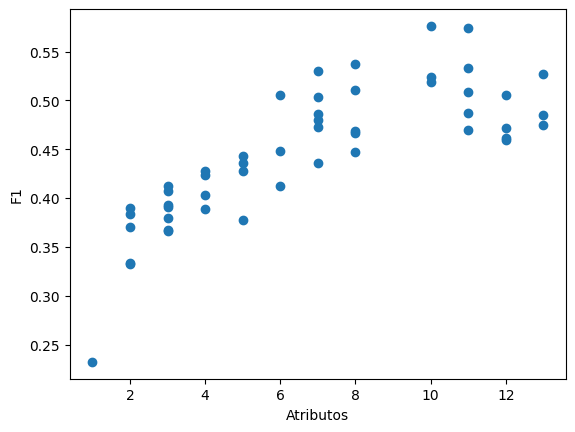

In [22]:
x_values_boosting = [tup[0] for tup in order_by_first_and_second_item_boosting]
y_values_boosting = [tup[1] for tup in order_by_first_and_second_item_boosting]

plt.scatter(x_values_boosting, y_values_boosting)
plt.xlabel('Atributos')
plt.ylabel('F1')
plt.show()

Podemos fijarnos claramente en que el punto álgido se encuentra alrededor de los 10 atributos en el caso de este modelo concreto. Es por eso que aquí considera 10 como la K óptima. 

**XGBOOST:**

In [23]:
selector = SelectKBest(f_classif)

# Modelo de XGBoost con filtro
xgboost_filter = Pipeline([('selector', selector),
                           ('xgboost', xgb.XGBClassifier(objective="binary:logistic", random_state=4))])


# Definición del espacio de búsqueda de hiperparámetros
xgboost_filter_params = {
    "selector__k": list(range(1,14)),
    "xgboost__colsample_bytree": [0.3,0.5,0.7],
    "xgboost__gamma": [0.1,0.25,0.45], 
    "xgboost__max_depth": [2,3,4,5,6], 
    "xgboost__n_estimators": [50,100,150],
    "xgboost__subsample": [0.6,0.5,0.4]}

xgboost_filter_rs = RandomizedSearchCV(estimator=xgboost_filter, 
                                param_distributions=xgboost_filter_params, 
                                random_state=4, 
                                n_iter=50, 
                                cv=stratified_cv, 
                                scoring = 'f1',
                                n_jobs=-1)

# Entrenamiento
start_time = time.time()
xgboost_filter_rs.fit(X_train_processed, y_train)
xgboost_filter_model = xgboost_filter_rs.best_estimator_
end_time = time.time()

print(f"Atributos seleccionados: {xgboost_filter_model.named_steps['selector'].get_support()}")
print()
print(f"Localicaciones de los atributos: {np.where(xgboost_filter_model.named_steps['selector'].get_support())}")
print(f"Nombres de los atributos en la tabla procesada: {xgboost_filter_model.named_steps['selector'].get_feature_names_out()}")
print()

elapsed_time_xgboost_filter = end_time - start_time
xgboost_filter_pred = xgboost_filter_model.predict(X_test_processed)


# Evaluación

print()
print(f'El mejor modelo (con filtro) encontrado es: {xgboost_filter_rs.best_params_}')
print()
print("Tiempo de ejecución para entrenar el modelo xgb (con filtro): ", elapsed_time_xgboost_filter)

balanced_accuracy_xgboost_filter = balanced_accuracy_score(y_test, xgboost_filter_pred)
f1_xgboost_filter = f1_score(y_test, xgboost_filter_pred)
confusion_matrix_xgboost_filter = confusion_matrix(y_test, xgboost_filter_pred)

print()
print("Balance Accuracy del xgboost (con filtro):", balanced_accuracy_xgboost_filter)
print("F1 del xgboost (con filtro):", f1_xgboost_filter)
print("Matriz de confusión del xgboost (con filtro):", confusion_matrix_xgboost_filter)


Atributos seleccionados: [ True False False False  True  True False  True False False False False
 False False False False  True False  True False  True  True  True False
 False False False  True False False False False False False False False
 False False False False False False False False  True  True  True]

Localicaciones de los atributos: (array([ 0,  4,  5,  7, 16, 18, 20, 21, 22, 27, 44, 45, 46]),)
Nombres de los atributos en la tabla procesada: ['x0' 'x4' 'x5' 'x7' 'x16' 'x18' 'x20' 'x21' 'x22' 'x27' 'x44' 'x45' 'x46']


El mejor modelo (con filtro) encontrado es: {'xgboost__subsample': 0.4, 'xgboost__n_estimators': 150, 'xgboost__max_depth': 4, 'xgboost__gamma': 0.45, 'xgboost__colsample_bytree': 0.7, 'selector__k': 13}

Tiempo de ejecución para entrenar el modelo xgb (con filtro):  30.788392543792725

Balance Accuracy del xgboost (con filtro): 0.6779543564630879
F1 del xgboost (con filtro): 0.49599999999999994
Matriz de confusión del xgboost (con filtro): [[1188   45]
 [ 144 

In [24]:
attributes_list = list(zip(xgboost_filter_rs.cv_results_['param_selector__k'].data, xgboost_filter_rs.cv_results_['mean_test_score']))

order_by_first_and_second_item_XGboost = sorted(attributes_list, key=lambda tup: (tup[0], tup[1]))

pprint(order_by_first_and_second_item_XGboost)

[(1, 0.031691173968821984),
 (1, 0.06214914759373089),
 (1, 0.07270609565942635),
 (1, 0.11910834388409086),
 (2, 0.20952508732394878),
 (2, 0.22735750029182963),
 (2, 0.26888027701965295),
 (2, 0.27847525317358435),
 (3, 0.2346017976143795),
 (3, 0.24991869994116683),
 (3, 0.2822879942096715),
 (3, 0.2961927866983644),
 (3, 0.30668665180369314),
 (4, 0.2961429533750569),
 (4, 0.31705515371817194),
 (4, 0.36373212258439863),
 (5, 0.2566051608342171),
 (5, 0.3106119188681405),
 (5, 0.3160006697459844),
 (5, 0.43212467555178546),
 (6, 0.28888564557416363),
 (7, 0.32758852658133236),
 (7, 0.3712325683217979),
 (7, 0.3915884893338756),
 (8, 0.3363152580706819),
 (8, 0.44264947360297746),
 (9, 0.3017285246282396),
 (9, 0.3706193712284633),
 (9, 0.40090624539099223),
 (9, 0.44653407816857926),
 (9, 0.47560033365273924),
 (10, 0.3504677092971725),
 (10, 0.4340272360830212),
 (10, 0.439066265060241),
 (10, 0.4642628575567825),
 (10, 0.4951891984864121),
 (11, 0.3782105828907031),
 (11, 0.38559

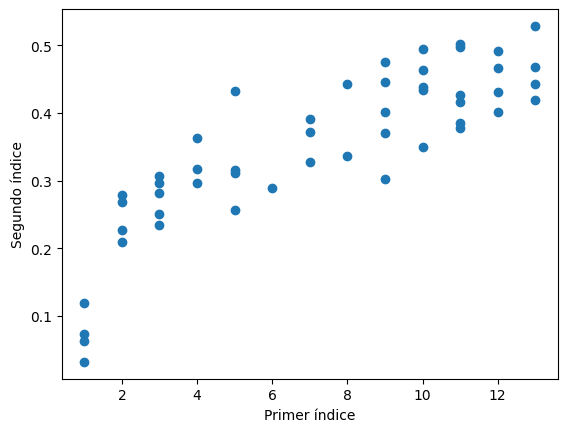

In [25]:
x_values_xgboost = [tup[0] for tup in order_by_first_and_second_item_XGboost]
y_values_xgboost = [tup[1] for tup in order_by_first_and_second_item_XGboost]

plt.scatter(x_values_xgboost, y_values_xgboost)
plt.xlabel('Primer índice')
plt.ylabel('Segundo índice')
plt.show()

En el scatter plot del XGBoost, nos podemos fijar en que 13 es el número elegido, debido a la distribución más alta de los scores F1 en esta zona de la tabla.

**¿QUÉ ATRIBUTOS SON LOS MÁS IMPORTANTES?**

En la sección de partición de datos, habíamos calculado un diccionario que nos relacionaba atributos de la tabla original de X_train con X_train procesado:

In [26]:
column_name_to_index

{'hrs': 0,
 'absences': 1,
 'JobInvolvement': 2,
 'PerformanceRating': 3,
 'EnvironmentSatisfaction': 4,
 'JobSatisfaction': 5,
 'WorkLifeBalance': 6,
 'Age': 7,
 'DistanceFromHome': 10,
 'Education': 11,
 'EmployeeID': 13,
 'JobLevel': 15,
 'MonthlyIncome': 18,
 'NumCompaniesWorked': 19,
 'PercentSalaryHike': 20,
 'StockOptionLevel': 21,
 'TotalWorkingYears': 22,
 'TrainingTimesLastYear': 23,
 'YearsAtCompany': 24,
 'YearsSinceLastPromotion': 25,
 'YearsWithCurrManager': 26}

Podemos fijarnos que en los tres modelos en los que se ha aplicado el filtro de selección de atributos de SelectKbest, tenemos que los atributos escogidos pertenecen a las siguientes columnas de la tabla procesada: **x0 x4 x5 x7 x16 x18 x20 x21 x22 x27 x44 x45 x46**

Debido a que algunas de estas columnas son fabricaciones sin un nombre interpretable,
mirando los nombres de las variables arriba, podemos sacar algunas conclusiones acerca de lo que sí sabemos: **el número de horas, la satisfacción con el entorno, la satisfacción en el trabajo, la edad del trabajador, el salario mensual, el porcentaje de aumento de salario, compensaciones empresariales y el total de años trabajados** son algunos de los factores que más influyen en la salida del modelo, y por tanto, en el "burnout" de un trabajador.




# SELECCIÓN DEL MEJOR MODELO

Ahora, con todo, vamos a resumir todos nuestros resultados en una tabla y dedicir cuál es el modelo que utilizaremos para entrenar nuestros datos completos:

In [27]:
# Crear un dataframe con los resultados de los modelos y sus tiempos
results = pd.DataFrame({'Model': ['Logistic Regression', 'Adaboost_M1', 'xgboost', 'Logistic Reg filter', 'Adaboost filter', 'XGboost filter'],
                        'Balanced Accuracy': [balanced_accuracy_logistic_regr, balanced_accuracy_boosting_mandatory, balanced_accuracy_xgboost, balanced_accuracy_logistic_regr_filter, 
                                              balanced_accuracy_boosting_mandatory_filter, balanced_accuracy_xgboost_filter],
                        'F1': [f1_logistic_regr, f1_boosting_mandatory, f1_xgboost, f1_logistic_regr_filter, f1_boosting_mandatory_filter, f1_xgboost_filter],
                        'Confusion Matrix': [confusion_matrix_logistic_regr, confusion_matrix_boosting_mandatory, confusion_matrix_xgboost, confusion_matrix_logistic_regr_filter, 
                                             confusion_matrix_boosting_mandatory_filter, confusion_matrix_xgboost_filter],
                        'Time': [elapsed_time_logistic_regr, elapsed_time_boosting_mandatory, elapsed_time_xgboost, elapsed_time_logistic_regr_filter, elapsed_time_boosting_mandatory_filter,
                                 elapsed_time_xgboost_filter]})


# Mostrar los resultados,  mejor info de modelos resultantes del HPO
display(results)


Model  Balanced Accuracy        F1          Confusion Matrix  \
0  Logistic Regression           0.705201  0.434670   [[865, 368], [69, 168]]   
1          Adaboost_M1           0.716165  0.595989   [[1225, 8], [133, 104]]   
2              xgboost           0.723228  0.592000  [[1206, 27], [126, 111]]   
3  Logistic Reg filter           0.692301  0.420513   [[854, 379], [73, 164]]   
4      Adaboost filter           0.713327  0.584270  [[1218, 15], [133, 104]]   
5       XGboost filter           0.677954  0.496000   [[1188, 45], [144, 93]]   

         Time  
0    0.061677  
1  499.249809  
2   79.910882  
3    0.041985  
4  208.469851  
5   30.788393

Comparando los modelos originales con los filtrados, en el caso de la logistic regression son muy parecidos, pero en los otros, las métricas empeoran bastante. Podemos sacar como conclusión que el filtrado de atributos no mejora las métricas en este caso.

Por ello, vamos a escoger **como nuestro modelo final el AdaBoost original.** Si bien es cierto que en cuanto a tiempo de ejecución es el peor de todos, su mejora sustancial en la métrica F1 y en la matriz lo hace el mejor modelo de los realizados.

Procederemos ahora a entrenar el modelo escogido con el conjunto de datos original sin dividir.

In [28]:
adaboost_bestmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_split=2,max_depth = 12, class_weight='balanced'), 
                                        n_estimators =50, learning_rate=0.1, random_state = 4)

start_time = time.time()
modelo_final = adaboost_bestmodel.fit(X_processed, y)
end_time = time.time()

elapsed_time_boosting_mandatory_model = end_time - start_time

print("Tiempo de ejecución para entrenar el modelo final Adaboost: ", elapsed_time_boosting_mandatory_model)

Tiempo de ejecución para entrenar el modelo final Adaboost:  2.687378168106079


Finalmente, almacenamos este modelo final en un fichero con extesión .pkl

In [29]:
dump(modelo_final, 'modelo_final.pkl')

['modelo_final.pkl']